## Proporcion de estudiantes de maestria que hicieron pregrado en uniandes

¿Los estudiantes que se graduan de pregrado ingresan inmediatamente a maestria?

In [212]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.ensemble

Cargamos los datos

In [213]:
grados= pd.read_excel ('Cuadro 28 Títulos de pregrado otorgados.xlsx',sheet_name='Hoja1')
proporcion_mp = pd.read_excel ('Cuadro 10 Estudiantes de maestría y proporción con pregrado de Uniandes.xlsx',sheet_name='Hoja1')
inscritos = pd.read_excel ('Cuadro 17 Inscritos admitidos y matriculados maestría.xlsx',sheet_name='Hoja1')
personal=pd.read_excel('Cuadro 32 Personal administración central y facultades.xlsx',sheet_name='Hoja1')

Extraemos los datos de las facultades

In [214]:
facultadesm=['Administración','Arquitectura y Diseño','Artes y Humanidades','Ciencias','Ciencias Sociales','CIDER','Derecho','Economía','Educación','Escuela de Gobierno','Ingeniería','Medicina']
facultadesp=['AdministraciónF','Arquitectura y Diseño','Artes y Humanidades','Ciencias','Ciencias Sociales','Derecho','Economía','Educación','Escuela de Gobierno','Ingeniería','Medicina']
grados=grados[grados['Facultad / Programa'].isin(facultadesp)]
proporcion_mp=proporcion_mp[proporcion_mp['Programa / Facultad'].isin(facultadesm)]
inscritos=inscritos[inscritos['Facultad y Programa'].isin(facultadesm)]

Limpiamos los datos

In [215]:
poblacionm=pd.DataFrame(proporcion_mp['Programa / Facultad'])
for i in proporcion_mp.columns:
    if '%' not in i:
        poblacionm[i]=proporcion_mp[i]
        proporcion_mp.drop(i, axis=1,inplace=True)
        
admitidos=pd.DataFrame(inscritos['Facultad y Programa'])
for i in inscritos.columns:
    if 'Admitido' in i:
        admitidos[i]=inscritos[i]
        inscritos.drop(i, axis=1,inplace=True)        
        
        
        
matriculados=pd.DataFrame(inscritos['Facultad y Programa'])
for i in inscritos.columns:
    if 'Matriculados' in i:
        matriculados[i]=inscritos[i]
        inscritos.drop(i, axis=1,inplace=True)
        
inscrito=pd.DataFrame(inscritos['Facultad y Programa'])
for i in inscritos.columns:
    if 'Inscritos' in i:
        inscrito[i]=inscritos[i]
        inscritos.drop(i, axis=1,inplace=True)
        
listap=personal.columns[1::]
for i in range(len(listap)-1):
    personal[(listap[i]+listap[i+1])/2]=round((personal[listap[i]]+personal[listap[i+1]])/2)

'        \nlistap=personal.iloc[0].tolist()\nnpersonal=[]\nfor i in range(len(listap)-1):\n    npersonal.append(listap[i])\n    npersonal.append(round((listap[i])+listap[i+1])/2)\nnpersonal.append()'

In [241]:
proporcion_mp

,%UA2006-1,%UA2006-2,%UA2007-1,%UA2007-2,%UA2008-1,%UA2008-2,%UA2009-1,%UA2009-2,%UA2010-1,%UA2010-2,...,%UA2016-2,%UA2017-1,%UA2017-2,%UA2018-1,%UA2018-2,%UA2019-1,%UA2019-2,%UA2020-1,%UA2020-2,%UA2021-1
16,0.204225,0.227979,0.245902,0.218045,0.230284,0.213087,0.218688,0.219599,0.221439,0.204861,...,0.212081,0.185550,0.201705,0.183333,0.230000,0.210287,0.194724,0.179558,0.187500,0.178322
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,...,0.169492,0.240741,0.181818,0.346154,0.250000,0.333333,0.313433,0.300000,0.292308,0.333333
29,NaN,NaN,1.000000,0.615385,0.388889,0.416667,0.466667,0.526316,0.619048,0.416667,...,0.404762,0.398058,0.512195,0.292308,0.260000,0.221374,0.242188,0.188976,0.252174,0.271930
36,0.472868,0.518797,0.524194,0.483051,0.470149,0.479452,0.556250,0.496774,0.485714,0.435065,...,0.443114,0.459016,0.477157,0.474286,0.420000,0.466667,0.450000,0.471910,0.469880,0.483146
49,0.300613,0.355422,0.300518,0.350000,0.359223,0.318182,0.304933,0.283898,0.284553,0.266667,...,0.256579,0.251613,0.250804,0.236667,0.240000,0.290837,0.281690,0.306122,0.274775,0.302632
54,0.187500,0.120000,0.208333,0.318182,0.190476,0.224490,0.181818,0.234043,0.153846,0.188679,...,0.200000,0.186047,0.122137,0.147287,0.160000,0.137681,0.141791,0.129496,0.161850,0.147651
55,NaN,NaN,0.289474,0.280000,0.297297,0.263158,0.256410,0.350000,0.354839,0.250000,...,0.518519,0.565217,0.400000,0.384615,0.142857,0.052632,0.222222,0.294118,0.351351,0.375000
62,0.486486,0.282609,0.289474,0.280000,0.297297,0.263158,0.256410,0.350000,0.354839,0.250000,...,0.261745,0.266667,0.270115,0.263514,0.240000,0.217742,0.226994,0.251852,0.319277,0.345070
66,0.414013,0.451807,0.470588,0.496241,0.530303,0.579710,0.564626,0.573864,0.574850,0.590426,...,0.583333,0.549784,0.527027,0.581921,0.490000,0.553672,0.445596,0.482143,0.470000,0.516129
67,0.181818,0.200000,0.300000,0.183673,0.173077,0.200000,0.158416,0.128205,0.134752,0.141935,...,0.050481,0.046005,0.053156,0.052381,0.068493,0.119266,0.135922,0.170732,0.215385,0.222222


In [216]:
personal

,Facultad,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Facultad de Administración,133,144,146,149,153,164,161,161,155,156
1,Facultad de Arquitectura y Diseño,86,88,89,94,95,97,96,99,102,98
2,Facultad de Artes y Humanidades,96,98,102,99,105,108,122,129,129,129
3,Facultad de Ciencias,207,217,223,221,233,232,230,241,235,231
4,Facultad de Ciencias Sociales,145,149,144,155,170,172,175,176,183,178
5,Facultad de Derecho,86,97,95,93,98,93,82,84,89,89
6,Facultad de Economía,62,72,68,72,70,71,69,69,68,68
7,Facultad de Economía,0,0,0,0,61,35,39,38,38,36
8,Facultad de Ingeniería,259,263,253,261,272,279,284,295,289,288
9,Facultad de Medicina,29,30,31,31,31,32,33,40,42,43


In [239]:
inscrito

,Facultad y Programa,Inscritos201210,Inscritos201220,Inscritos201310,Inscritos201320,Inscritos201410,Inscritos201420,Inscritos201510,Inscritos201520,Inscritos201610,Inscritos201620,Inscritos201710,Inscritos201720,Inscritos201810,Inscritos201820,Inscritos201910,Inscritos201920,Inscritos202010,Inscritos202020,Inscritos202110
12,Administración,1.0,533.0,1.0,447.0,1.0,453.0,12.0,301.0,4.0,410.0,16.0,355.0,9.0,523.0,175.0,463.0,148,763,341.0
16,Arquitectura y Diseño,26.0,14.0,13.0,26.0,14.0,50.0,16.0,40.0,22.0,41.0,36.0,37.0,19.0,41.0,18.0,53.0,17,35,32.0
25,Artes y Humanidades,43.0,30.0,46.0,39.0,27.0,29.0,37.0,39.0,35.0,94.0,99.0,96.0,113.0,101.0,106.0,70.0,65,140,154.0
30,CIDER,16.0,22.0,43.0,32.0,53.0,63.0,43.0,40.0,49.0,59.0,68.0,56.0,64.0,83.0,78.0,66.0,51,110,105.0
37,Ciencias,101.0,117.0,81.0,90.0,102.0,109.0,114.0,117.0,109.0,107.0,126.0,136.0,126.0,98.0,85.0,66.0,43,104,111.0
50,Ciencias Sociales,201.0,130.0,157.0,149.0,147.0,149.0,170.0,161.0,231.0,192.0,193.0,163.0,173.0,131.0,177.0,122.0,134,205,212.0
58,Derecho,1.0,99.0,5.0,114.0,2.0,136.0,5.0,145.0,2.0,178.0,6.0,205.0,6.0,183.0,6.0,177.0,11,197,14.0
61,Economía,70.0,86.0,74.0,97.0,83.0,85.0,92.0,72.0,149.0,126.0,127.0,58.0,116.0,79.0,134.0,76.0,125,114,161.0
65,Educación,51.0,49.0,31.0,87.0,108.0,161.0,63.0,282.0,180.0,323.0,94.0,57.0,93.0,48.0,28.0,26.0,32,44,49.0
70,Escuela de Gobierno,84.0,5.0,101.0,68.0,64.0,56.0,82.0,38.0,74.0,27.0,61.0,53.0,65.0,117.0,107.0,103.0,85,182,136.0


Graficamos los datos

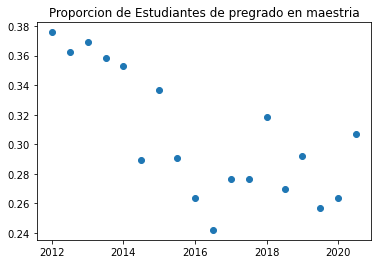

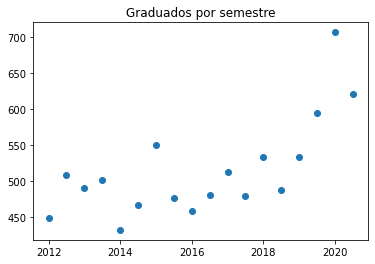

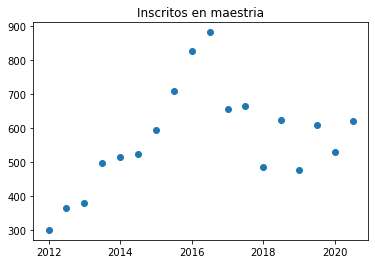

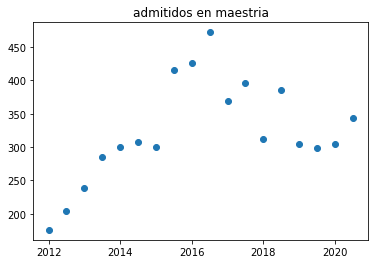

Text(0.5, 1.0, 'Personal de apoyo en la facultad')

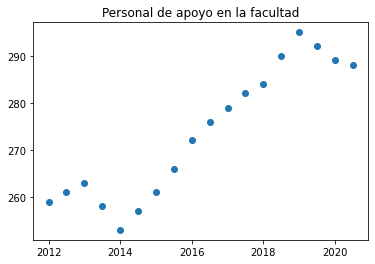

In [220]:
v=np.linspace(2012,2020.5,18)
prop_ing=proporcion_mp.iloc[-2][12:-1]
grad_pre=grados.iloc[-2][21:-1]
#poblacion=poblacionm.iloc[-2][1:-1]
admitido=admitidos.iloc[-2][1:-1]
inscripcion=inscrito.iloc[-2][1:-1]
Personal=personal[v].iloc[-2]

plt.scatter(v,prop_ing)
plt.title('Proporcion de Estudiantes de pregrado en maestria')
plt.show()
plt.scatter(v,grad_pre)
plt.title('Graduados por semestre')
plt.show()
plt.scatter(v,inscripcion)
plt.title('Inscritos en maestria')
plt.show()
plt.scatter(v,admitido)
plt.title('admitidos en maestria')
plt.show()
plt.scatter(v,Personal)
plt.title('Personal de apoyo en la facultad')

Hacemos el split

In [162]:
x=[v,np.array(grad_pre),np.array(inscripcion),np.array(admitido),np.array(Personal)]
y=prop_ing
dataX=pd.DataFrame(data=np.transpose(x),columns=['periodo','graduados','inscritos','admitidos','personal'])

In [163]:
x_train, x_test, y_train, y_test = train_test_split(dataX, y, test_size=0.2)

Entrenamos un bosque aleatorio y una regresion lineal

In [174]:
lr=LinearRegression()
lr.fit(x_train,y_train)
rf=sklearn.ensemble.RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

Evaluamos metricas

In [234]:
print('Linear regression metrics')
print('r2 test',sklearn.metrics.r2_score(y_test,lr.predict(x_test)))
print('r2 train',sklearn.metrics.r2_score(y_train,lr.predict(x_train)))

Linear regression metrics
r2 test 0.6350505455882284
r2 train 0.818812950842482


In [235]:
print('Random Forest')
print('r2 test',sklearn.metrics.r2_score(y_test,rf.predict(x_test)))
print('r2 train',sklearn.metrics.r2_score(y_train,rf.predict(x_train)))

Random Forest
r2 test 0.4408809466848683
r2 train 0.9552215236628419


Predecimos a 2021

In [236]:
print('prediccion',lr.predict(np.array([2021,grados.iloc[-2][-1],inscrito.iloc[-2][-1],admitidos.iloc[-2][-1],personal[2021].iloc[-2]]).reshape(1, -1)))
print('real',proporcion_mp.iloc[-2][-1])

prediccion [0.24507305]
real 0.3142597638510445


Coeficientes de la regresion lineal

<BarContainer object of 5 artists>

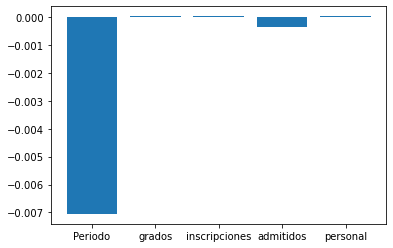

In [263]:
predictors=['Periodo','grados','inscripciones','admitidos','personal']

importances=lr.coef_
plt.bar(predictors,importances)
